In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

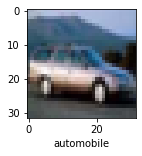

In [9]:
plot_sample(X_train, y_train, 4)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.9239 - accuracy: 0.3110
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.6387 - accuracy: 0.4198
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5533 - accuracy: 0.4536
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4858 - accuracy: 0.4754
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4327 - accuracy: 0.4934
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3927 - accuracy: 0.5067
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3463 - accuracy: 0.5281
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3157 - accuracy: 0.5431
Epoch 9/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2850 - accuracy: 0.5487
Epoch 10/10
1563/1563 [==============================] - 106s 68

In [12]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.3601 - accuracy: 0.5126


[1.3601247072219849, 0.5126000046730042]

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.46      0.55      1000
           1       0.78      0.44      0.57      1000
           2       0.40      0.45      0.42      1000
           3       0.41      0.26      0.32      1000
           4       0.49      0.39      0.44      1000
           5       0.44      0.40      0.42      1000
           6       0.52      0.64      0.58      1000
           7       0.59      0.59      0.59      1000
           8       0.48      0.79      0.60      1000
           9       0.49      0.70      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.53      0.51      0.51     10000



In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.7028 - accuracy: 0.3798
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1682 - accuracy: 0.5897
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0126 - accuracy: 0.6458
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9119 - accuracy: 0.6843
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8436 - accuracy: 0.7088
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7808 - accuracy: 0.7317
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7260 - accuracy: 0.7497
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6924 - accuracy: 0.7600
Epoch 9/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6393 - accuracy: 0.7757
Epoch 10/10
1563/1563 [==============================] - 57s 36m

In [16]:
 cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9096 - accuracy: 0.7017


[0.9096089601516724, 0.70169997215271]

In [17]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

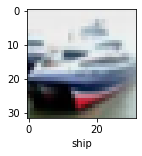

In [18]:
plot_sample(X_test, y_test, 1)

In [19]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 3, 8, 6]

In [20]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

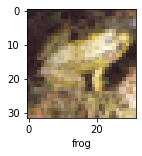

In [21]:
plot_sample(X_test, y_test, 19)

In [22]:
classes[y_classes[19]]

'frog'

In [23]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.81      0.79      0.80      1000
           2       0.55      0.62      0.58      1000
           3       0.57      0.48      0.52      1000
           4       0.61      0.72      0.66      1000
           5       0.67      0.55      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.76      0.73      0.75      1000
           8       0.78      0.82      0.80      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

